### Quin expert tria el router?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

Number of unique questions: 1273
Number of duplicated questions: 0
Percentage of unique questions: 100.00%


<Figure size 1000x600 with 0 Axes>

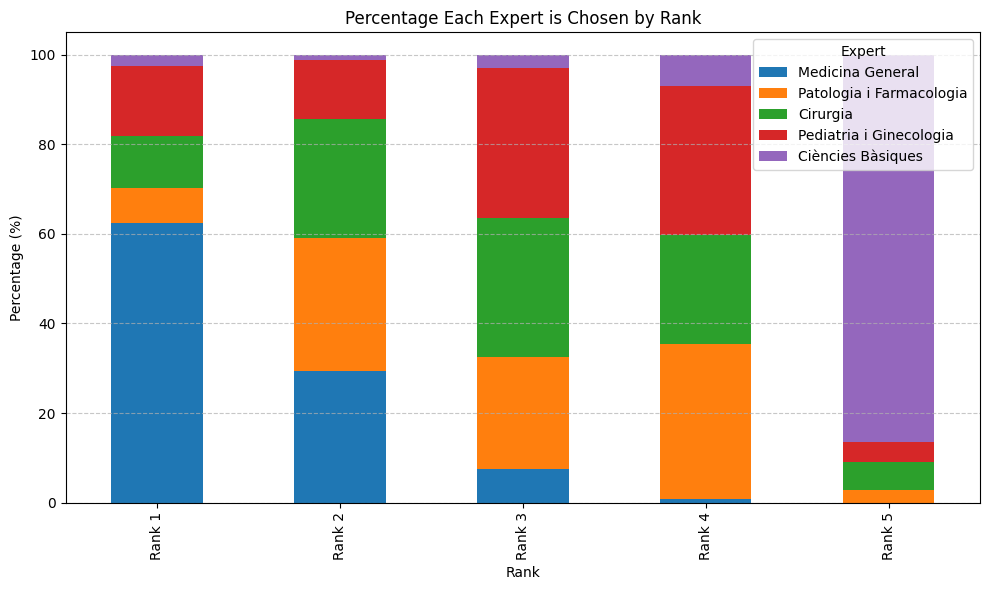

Average Rank for Each Expert:
Medicina General: 1.47
Cirurgia: 2.87
Patologia i Farmacologia: 2.95
Pediatria i Ginecologia: 2.98
Ciències Bàsiques: 4.74


In [19]:
# Read the JSON file
with open("expert_scores.json", "r") as file:

    data = json.load(file)

# Convert the JSON data to a DataFrame

df = pd.DataFrame(data)
# Get the unique questions
questions = df["question"].unique()
# Print number of duplicated questions
print(f"Number of unique questions: {len(questions)}")
print(f"Number of duplicated questions: {len(df) - len(questions)}")
print(f"Percentage of unique questions: {len(questions) / len(df) * 100:.2f}%")

# Save unique questions to JSON with cosine similarity scores
with open("expert_scores.json", "w") as file:
    # Save only the unique questions with their scores
    unique_questions = df.drop_duplicates(subset=["question"])
    unique_questions.to_json(file, orient="records", indent=4)

# Extract ranks for each expert

experts = ["Medicina General", "Patologia i Farmacologia", "Cirurgia", "Pediatria i Ginecologia", "Ciències Bàsiques"]

ranks = {expert: [0, 0, 0, 0, 0] for expert in experts}  # Position 0 is rank 1, position 1 is rank 2, etc.


for _, row in df.iterrows():

    # Sort scores in descending order

    sorted_scores = sorted(row["scores"], key=lambda x: x[0], reverse=True)

    for rank, (_, expert) in enumerate(sorted_scores):

        ranks[expert][rank] += 1


# Convert to percentages
total_questions = len(df)

rank_percentages = {}

for expert, rank_counts in ranks.items():

    rank_percentages[expert] = [count / total_questions * 100 for count in rank_counts]


# Create a DataFrame for easier plotting

rank_df = pd.DataFrame(rank_percentages, index=["Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5"])


# Plot the percentages

plt.figure(figsize=(10, 6))

rank_df.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Rank")

plt.ylabel("Percentage (%)")
plt.title("Percentage Each Expert is Chosen by Rank")
plt.legend(title="Expert")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("expert_ranks.png")
plt.show()

# Print the average rank for each expert
average_ranks = {expert: np.average([i + 1 for i in range(5)], weights=rank_df.loc[:, expert]) for expert in experts}
average_ranks = sorted(average_ranks.items(), key=lambda x: x[1])
print("Average Rank for Each Expert:")
for expert, avg_rank in average_ranks:
    print(f"{expert}: {avg_rank:.2f}")

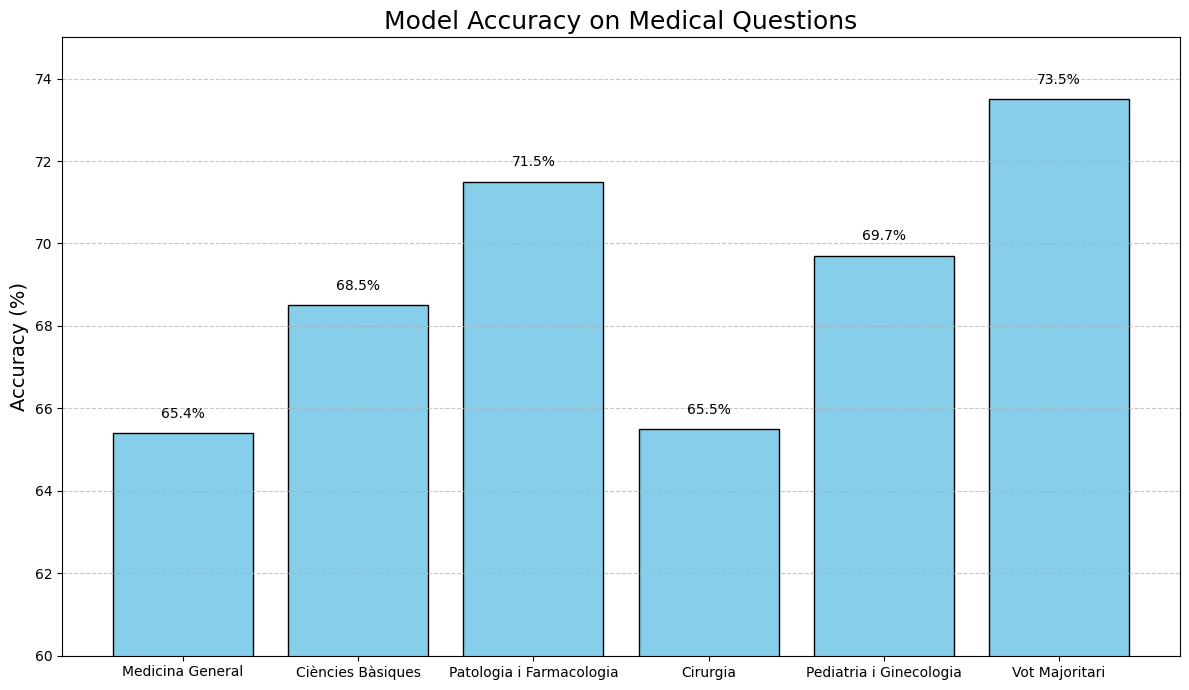

In [20]:
# Create bar chart of accuracies
plt.figure(figsize=(12, 7))
accuracies = [68.8, 71.8, 71.8, 72.8, 75.7]
labels = [f"Top {x + 1} Experts" for x in range(5)]
accuracies = [65.4, 68.5, 71.5, 65.5, 69.7, 73.5]
labels = [
    "Medicina General",
    "Ciències Bàsiques",
    "Patologia i Farmacologia",
    "Cirurgia",
    "Pediatria i Ginecologia",
    "Vot Majoritari",
]

bars = plt.bar(labels, accuracies, color="skyblue", edgecolor="black")

# Set y-axis range from 60 to 80
plt.ylim(60, 75)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.3, f"{height}%", ha="center", va="bottom")

# plt.title("Accuracy by Number of Experts", fontsize=16)
plt.title("Model Accuracy on Medical Questions", fontsize=18)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add tight layout
plt.tight_layout()
plt.show()

C:\Users\nils\AppData\Local\Temp\ipykernel_5104\2263884665.py:47: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


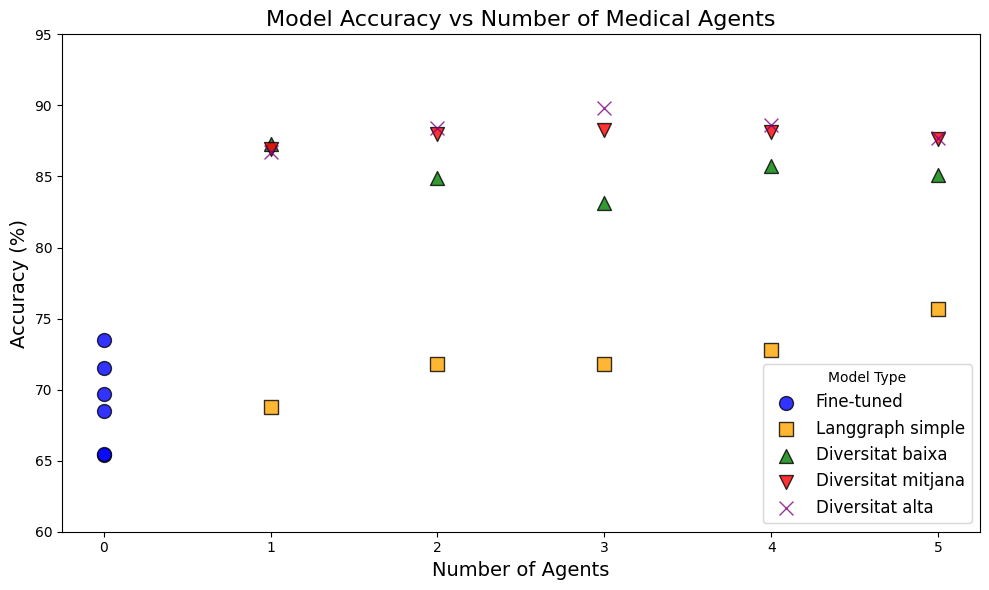

In [66]:
# Create a scatter plot of accuracy vs number of agents
plt.figure(figsize=(10, 6))
# Hem anat guardant les dades de precisió en diferents execucions (no ho fem tot de cop per qüestió de temps)
num_agents = [0, 1, 2, 3, 4, 5]
accuracies = {
    "Fine-tuned": [65.4, 68.5, 71.5, 65.5, 69.7, 73.5],
    "Langgraph simple": [None, 68.8, 71.8, 71.8, 72.8, 75.7],
    "Diversitat baixa": [None, 87.3, 84.9, 83.1, 85.7, 85.1],
    "Diversitat mitjana": [None, 86.9, 88.0, 88.3, 88.1, 87.6],
    "Diversitat alta": [None, 86.7, 88.4, 89.8, 88.6, 87.7],
}
model_types = [
    "Fine-tuned",
    "Langgraph simple",
    "Diversitat baixa",
    "Diversitat mitjana",
    "Diversitat alta",
]

# Dictionary for marker styles and colors by model type
markers = {
    "Fine-tuned": "o",
    "Langgraph simple": "s",
    "Diversitat baixa": "^",
    "Diversitat mitjana": "v",
    "Diversitat alta": "x",
}
colors = {
    "Fine-tuned": "blue",
    "Langgraph simple": "orange",
    "Diversitat baixa": "green",
    "Diversitat mitjana": "red",
    "Diversitat alta": "purple",
}

# Plot each model type
for model in model_types:
    # For fine-tuned models, plot all 6 accuracy values at x=0
    if model == "Fine-tuned":
        x_values = [0] * 6  # All at x=0
        y_values = accuracies[model]
    else:
        x_values = num_agents[1:]  # Skip the first value (0 agents) for other models
        y_values = [acc for acc in accuracies[model] if acc is not None]

    # Add scatter points
    plt.scatter(
        x_values,
        y_values,
        marker=markers[model],
        color=colors[model],
        s=100,
        edgecolors="black",
        linewidth=1,
        alpha=0.8,
        label=model,
    )

# Customize the plot
plt.title("Model Accuracy vs Number of Medical Agents", fontsize=16)
plt.xlabel("Number of Agents", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(60, 95)

# Add legend
plt.legend(title="Model Type", frameon=True, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\nils\AppData\Local\Temp\ipykernel_5104\3451601001.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


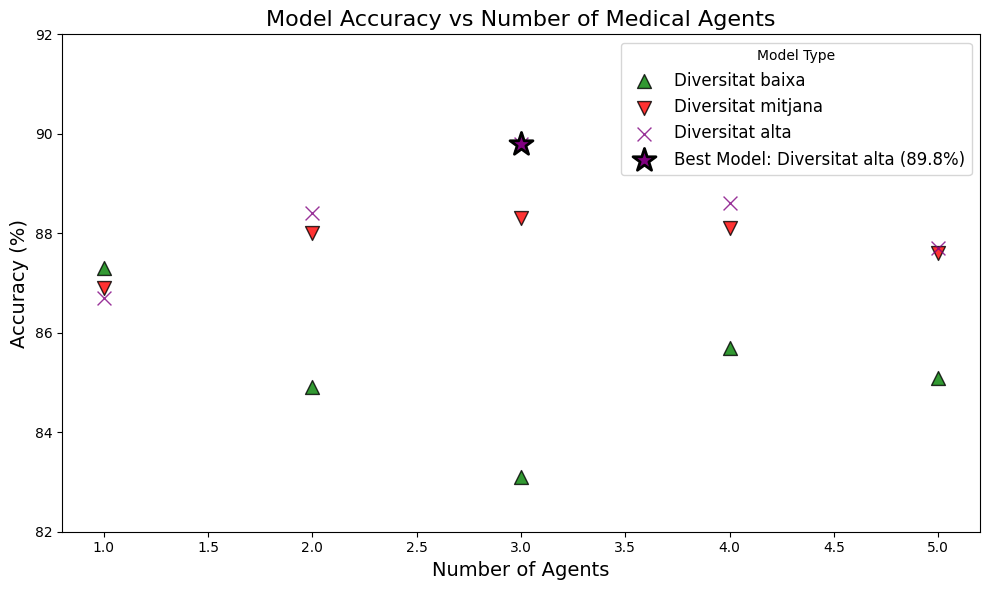

In [65]:
# ZOOM
# Create a scatter plot of accuracy vs number of agents
plt.figure(figsize=(10, 6))
num_agents = [1, 2, 3, 4, 5]
accuracies = {
    "Diversitat baixa": [87.3, 84.9, 83.1, 85.7, 85.1],
    "Diversitat mitjana": [86.9, 88.0, 88.3, 88.1, 87.6],
    "Diversitat alta": [86.7, 88.4, 89.8, 88.6, 87.7],
}
model_types = [
    "Diversitat baixa",
    "Diversitat mitjana",
    "Diversitat alta",
]

# Dictionary for marker styles and colors by model type
markers = {
    "Diversitat baixa": "^",
    "Diversitat mitjana": "v",
    "Diversitat alta": "x",
}
colors = {
    "Diversitat baixa": "green",
    "Diversitat mitjana": "red",
    "Diversitat alta": "purple",
}

# Plot each model type
for model in model_types:
    x_values = num_agents  # Skip the first value (0 agents) for other models
    y_values = [acc for acc in accuracies[model] if acc is not None]

    # Add scatter points
    plt.scatter(
        x_values,
        y_values,
        marker=markers[model],
        color=colors[model],
        s=100,
        edgecolors="black",
        linewidth=1,
        alpha=0.8,
        label=model,
    )

# Highlight the best model (3 agents, Diversitat alta)
best_model = "Diversitat alta"
best_accuracy = accuracies[best_model][2]  # 3 agents corresponds to index 2
plt.scatter(
    3,  # x value for 3 agents
    best_accuracy,
    marker="*",
    color=colors[best_model],
    s=300,
    edgecolors="black",
    linewidth=2,
    alpha=1.0,
    label=f"Best Model: {best_model} ({best_accuracy}%)",
)
# Customize the plot
plt.title("Model Accuracy vs Number of Medical Agents", fontsize=16)
plt.xlabel("Number of Agents", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(82, 92)

# Add legend
plt.legend(title="Model Type", frameon=True, fontsize=12)
plt.tight_layout()
plt.savefig("model_accuracy_vs_agents_zoomed.png")
plt.show()